<a href="https://colab.research.google.com/github/jarrodsb/DSPS_JBieber/blob/main/HW3/Solutions_KS_earthquakes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Jarrod Bieber - PHYS 461 Homework 3


---



Created by FedericaBBianco @fedhere for DSPS/MLNPS
# Kolmogorov Smirnoff test, application to earthquake data

In [1]:
#all the imports I needed
import pandas as pd
import pylab as pl
import scipy as sp
from scipy import stats
#%pylab inline
#pl.style.use("https://raw.githubusercontent.com/fedhere/DSPS/master/fbb.mplstyle")
import numpy as np

This homework asks you to reproduce the work in [Corral 2018](https://arxiv.org/pdf/0910.0055.pdf) which is well described, but not "reproducible".
Corral 2018 uses a K-S test to show that at different magnitude scales the time gaps between earthquakes follows the same distribution. If true, this indicates that there is a consistent scaling law.

The argument is a little convoluted, but it is a somewhat innovative use of the test. Corall compares the time gap between earthquakes  greater than a certain magnitude threshold with the time gaps between earthquakes above a different threshold, and finds no differences.

Remind yourself exactly what the K-S test is about :

    1 What is the test's Null Hypothsis that the K-S test tests?
    
    


There is no difference in the populations from which we obtain the two earthquake time gap samples (the populations are the same).

    2 What is the "statistic" or "pivotal quantity" that the test uses?
    


The test *statistic* is the maximum difference between the two earthquake time gap samples.



    3 What does the probability distribution of this statistic depend on?
    
   


The probability distribution for the statistic depends on the number of data N in each of the sets of earthquake time gap samples.

    

# PART I:  Data Retrival

The first reason why the paper is not techincally _reproducible_ is that, while a link is provided to retrieve the data, the link is dead. This happens often. Services like [Zenodo](https://zenodo.org/) or journals that serve data provide some insurance against this but unfortunately the standards are not strict.

You can retrieve the data yourself from [this website](http://service.scedc.caltech.edu/eq-catalogs/poly.php). Think about what setting up data like this means for reproducibility. Did the author comply to reproducibility standards?__ Make sure the number of entries in your final dataset is similar to that of the authors. I got 70798, instead of 77000. 10% off, which I deem close enough. You should get something similar. Use the map in the paper to determine the region of interest. Call the file earthquakes_\<firstinitialLastname\>.csv and upload it to your github repository. Read it your file, instead of mine as instructed below. If you are getting weird results compare to what I got, go back and check how the files differ.

# Data Ingestion

## read in data

I saved the data in a file called "earthquakes.csv", where ```csv``` stands for "comma separated file". [This file format](https://www.howtogeek.com/348960/what-is-a-csv-file-and-how-do-i-open-it/) requires different entries in a row to be separated by commas alone (no space) and for commas to be used in quote if they are not intended to separate entries.

```
a,b,c
d,e,f
g,"h,2",i
```
The data is uploaded on the  github homework repository but to read it in you will need to get the link to the *raw file*: the link to the file earthquakes.csv which is in my GitHub repository https://github.com/fedhere/DSPS_FBianco/tree/main/data takes you to an ```html``` page that includes the content of the file, but you want to isolate the content of the file itself: the _raw file_. Pay attention to this: from the next time I will not give you the exact link, I will just point you to the file and you will have to find the link to the raw data from there. (remember to use the "raw" link)

The data can be read effectively using the _pandas_ python package as ```pandas.read_csv(<file name or URL>)```.

However, I did not format the data correctly, according to the csv extension requirement. This happens all the time. Look at the file and use the pandas documentation to figure out how to read it with ```pd.read_csv()```

In [2]:
eqdata = pd.read_csv("https://raw.githubusercontent.com/jarrodsb/DSPS_JBieber/refs/heads/main/HW3/earthquakes_jBieber.csv", sep=r"\s+")

running the following lines of code should give you the same result as mine if you used the file I provided (467 students), and qualitatively  similar if you are using your own data (667 students)

In [3]:
#note: the number of columns may be different depending on how you read the data in. The number of ROWs MUST be the same
eqdata.shape #also note: in class we used a different name for the dataframe

(77732, 13)

In [4]:
eqdata.head()

,#YYY/MM/DD,HH:mm:SS.ss,ET,GT,MAG,M,LAT,LON,DEPTH,Q,EVID,NPH,NGRM
0,1984/01/01,01:30:57.52,eq,l,2.02,c,33.246,-116.433,1.6,C,28255,13,17
1,1984/01/01,05:31:34.16,eq,l,2.12,c,32.945,-116.295,5.4,C,28259,18,42
2,1984/01/01,06:59:05.14,eq,l,2.43,c,33.343,-117.628,5.6,C,28260,13,30
3,1984/01/01,11:10:25.29,eq,l,2.07,c,33.668,-116.780,13.8,C,28270,19,40
4,1984/01/01,13:50:47.62,eq,l,2.25,c,35.944,-118.322,-1.4,C,28546,29,56


In [5]:
eqdata.tail()

,#YYY/MM/DD,HH:mm:SS.ss,ET,GT,MAG,M,LAT,LON,DEPTH,Q,EVID,NPH,NGRM
77727,2002/12/31,06:15:19.97,eq,l,2.15,l,34.00350,-116.39317,10.3,A,9875101,91,572
77728,2002/12/31,11:34:28.03,eq,l,2.14,l,32.25667,-115.82533,6.8,C,9875125,23,118
77729,2002/12/31,21:59:58.92,eq,l,2.18,l,33.18617,-115.61100,1.7,A,9875225,39,225
77730,2002/12/31,22:48:19.60,eq,l,2.70,l,31.75567,-116.65500,5.3,C,9875233,27,342
77731,2002/12/31,23:14:22.12,eq,l,2.54,l,31.76800,-116.63417,8.2,B,9875241,16,233


In [6]:
eqdata.describe()

,MAG,LAT,LON,DEPTH,EVID,NPH,NGRM
count,77732.000000,77732.000000,77732.000000,77732.000000,7.773200e+04,77732.000000,77732.000000
mean,2.422969,34.041530,-116.870060,5.111864,3.776969e+06,30.793174,181.006960
std,0.411363,1.140647,1.034608,4.119382,3.459552e+06,22.110837,229.030391
min,2.000000,31.170670,-120.858000,-2.100000,2.825500e+04,0.000000,0.000000
25%,2.130000,33.188000,-117.653873,2.200000,7.445618e+05,16.000000,61.000000
50%,2.310000,34.119000,-116.583000,4.900000,3.054492e+06,25.000000,117.000000
75%,2.590000,34.615000,-116.273000,6.400000,7.044111e+06,39.000000,221.000000
max,7.300000,37.367000,-113.719000,29.300000,3.736673e+07,406.000000,3815.000000


now that you have a dataframe object you can use methods of the object to modify it. Use the method ```eqdata.rename``` to change the names of the 3 columns that are the only three relevant to us: _date, time, magnitude_

## prepare date-time column

In [7]:
eqdata.columns

Index(['#YYY/MM/DD', 'HH:mm:SS.ss', 'ET', 'GT', 'MAG', 'M', 'LAT', 'LON',
       'DEPTH', 'Q', 'EVID', 'NPH', 'NGRM'],
      dtype='object')

In [8]:
eqdata = eqdata[['#YYY/MM/DD', 'HH:mm:SS.ss', "MAG"]]

In [9]:
eqdata.rename({"#YYY/MM/DD": "date", "HH:mm:SS.ss": "time", "MAG": "mag"}, axis=1, inplace=True)

In [10]:
eqdata.head()

,date,time,mag
0,1984/01/01,01:30:57.52,2.02
1,1984/01/01,05:31:34.16,2.12
2,1984/01/01,06:59:05.14,2.43
3,1984/01/01,11:10:25.29,2.07
4,1984/01/01,13:50:47.62,2.25


In [11]:
eqdata.describe()

,mag
count,77732.000000
mean,2.422969
std,0.411363
min,2.000000
25%,2.130000
50%,2.310000
75%,2.590000
max,7.300000


Now you want to combine the columns containing date and time and convert them to a "datetime" kind of data object.


What data type are the _time_ and _date_ columns right now? What type you want them to be to conver them to datetime with ```pd.datetime()```? type 'O' means object, typically a string.

In [12]:
eqdata.time.dtype, eqdata.date.dtype

(dtype('O'), dtype('O'))

to do this conversion I

   1. joined date and time into a single string for each row with a ["list comprehension"](https://www.pythonforbeginners.com/basics/list-comprehensions-in-python) (essentially a for loop but more efficient and compact). You do not have to do it with a list comprehension, you can use just a for loop.

   2. used pd.datetime() to convert the resulting new dataframe column into a dataframe column containing _datetime_ objects (see lab)

   3. but this did not work because of the formatting of some dates, so I had to go back and fix 5 entries. (you are on your own to figure out this one)

In [13]:
eqdata["newdate"] = eqdata["date"].map(pd.to_datetime)

In [14]:
for i in eqdata.index:
  if eqdata.loc[i, "time"].endswith('60.00'):
    print("Entry " + str(i) + ": " + eqdata.loc[i, "time"])
    eqdata.loc[i, "time"] = eqdata.loc[i, "time"][:6] + "59.99"
    print(eqdata.loc[i, "time"])
  if eqdata.loc[i, "time"].endswith('24:60.99'):
    print("Entry " + str(i) + ": " + eqdata.loc[i, "time"])
    eqdata.loc[i, "time"] = eqdata.loc[i, "time"][:3] + "25:00.99"
    print(eqdata.loc[i, "time"])

Entry 1849: 04:48:60.00
04:48:59.99
Entry 25963: 14:19:60.00
14:19:59.99
Entry 36356: 21:48:60.00
21:48:59.99
Entry 54736: 15:34:60.00
15:34:59.99
Entry 64902: 06:41:60.00
06:41:59.99
Entry 66246: 23:24:60.99
23:25:00.99


In [15]:
eqdata["datetime"] = eqdata["date"] + " " + eqdata["time"]

In [16]:
eqdata["newdatetime"] = eqdata["datetime"].map(pd.to_datetime)

In [17]:
eqdata = eqdata[['date', 'time', 'mag', 'newdatetime']]

In [18]:
eqdata.rename({"newdatetime": "datetime"}, axis=1, inplace=True)

In [19]:
eqdata.head()

,date,time,mag,datetime
0,1984/01/01,01:30:57.52,2.02,1984-01-01 01:30:57.520
1,1984/01/01,05:31:34.16,2.12,1984-01-01 05:31:34.160
2,1984/01/01,06:59:05.14,2.43,1984-01-01 06:59:05.140
3,1984/01/01,11:10:25.29,2.07,1984-01-01 11:10:25.290
4,1984/01/01,13:50:47.62,2.25,1984-01-01 13:50:47.620


## select valuable data
Starting here is stuff we did not do together in class but is part of the homework due on 9/17


Following the description in Section 2  of Corral 2018 I removed all data that did not belong to a "stationary" period. Third paragraph section 2 of Corral 2018. You can see the cell of code I used to do this [here](https://github.com/fedhere/DSPS_FBianco/blob/master/HW3/Corral2018_selectStationary.py) at no points cost, cause it was a bit tricky, but I encourage you to try and do it yourself. If you can do it in fewer lines than I did its automatically +5 points (just turning the loop into a list comprehension does not count. That is an obvious way to decrease the number of lines of code; I did not do it simply to enhance readability.)

In [20]:
# create empty container
ss = []

# loop through all year pairs as year and fraction of year
for t in [(1984, 1986.5),
          (1990.3, 1992.1),
          (1994.6, 1995.6),
          (1996.1,1996.5),
          (1997,1997.6),
          (1997.75,1998.15),
          (1998.25,1999.35),
          (2000.55,2000.8),
          (2000.9 ,2001.25),
          (2001.6 ,2002),
          (2002.5 ,2003)]:

    # for each pair I convert the year to datetime (easy)
    # then I convert the fraction of year and convert it to days and convert that to a delta-time
    # finally I add that deltatime to the year datetime.
    ss.append((pd.to_datetime(int(t[0]), format="%Y")
        + pd.Timedelta('%.f days'%((t[0] - int(t[0])) * 365.25)),
               pd.to_datetime(int(t[1]), format="%Y")
        + pd.Timedelta('%.f days'%((t[1] - int(t[1])) * 365.25))))

In [21]:
print ("the {} timestamp pairs that are the boundaries of good data periods are:".format(len(ss)))
print(ss)

the 11 timestamp pairs that are the boundaries of good data periods are:
[(Timestamp('1984-01-01 00:00:00'), Timestamp('1986-07-03 00:00:00')), (Timestamp('1990-04-21 00:00:00'), Timestamp('1992-02-07 00:00:00')), (Timestamp('1994-08-08 00:00:00'), Timestamp('1995-08-08 00:00:00')), (Timestamp('1996-02-07 00:00:00'), Timestamp('1996-07-02 00:00:00')), (Timestamp('1997-01-01 00:00:00'), Timestamp('1997-08-08 00:00:00')), (Timestamp('1997-10-02 00:00:00'), Timestamp('1998-02-25 00:00:00')), (Timestamp('1998-04-02 00:00:00'), Timestamp('1999-05-09 00:00:00')), (Timestamp('2000-07-20 00:00:00'), Timestamp('2000-10-19 00:00:00')), (Timestamp('2000-11-25 00:00:00'), Timestamp('2001-04-02 00:00:00')), (Timestamp('2001-08-08 00:00:00'), Timestamp('2002-01-01 00:00:00')), (Timestamp('2002-07-03 00:00:00'), Timestamp('2003-01-01 00:00:00'))]


The following cell of code shows you the array of bool values (True/False) which I create to use as an index to the input array: when used as an index, a technique called "broadcasting" in python, will select only elements of the original array where the index array value is True. something like
Try:



In [22]:
a = np.array([0, 1, 2])
a, a[[True, False, True]]

(array([0, 1, 2]), array([0, 2]))

For each of the 11 valid periods I create a condition
``` datetime >= period_start AND datetime <= period_end ``` where AND is a product of booleans: True * False = False.

I want to take all chinks of data that satisfy this condition for any of the 11 chunks of time so that is a logical OR operator, or a sum of Booleans: True + False = True

This is because ```True``` really corresponds to "not 0" and False to "0". So ```"not 0" * 0 = 0``` and ```"not 0" + 0 = not 0```
    

In [23]:
# data between start and end of first time period
gooddates = (((eqdata.datetime >= ss[0][0]) * (eqdata.datetime <= ss[0][1])) +\
        # data between start and end of second time period
        ((eqdata.datetime >=ss [1][0]) * (eqdata.datetime <= ss[1][1])) +\
        ((eqdata.datetime >=ss [2][0]) * (eqdata.datetime <= ss[2][1])) +\
        ((eqdata.datetime >=ss [3][0]) * (eqdata.datetime <= ss[3][1])) +\
        ((eqdata.datetime >=ss [4][0]) * (eqdata.datetime <= ss[4][1])) +\
        ((eqdata.datetime >=ss [5][0]) * (eqdata.datetime <= ss[5][1])) +\
        ((eqdata.datetime >=ss [6][0]) * (eqdata.datetime <= ss[6][1])) +\
        ((eqdata.datetime >=ss [7][0]) * (eqdata.datetime <= ss[7][1])) +\
        ((eqdata.datetime >=ss [8][0]) * (eqdata.datetime <= ss[8][1])) +\
        ((eqdata.datetime >=ss [9][0]) * (eqdata.datetime <= ss[9][1])) +\
        # data between start and end of last time period
        ((eqdata.datetime >=ss [10][0]) * (eqdata.datetime <= ss[10][1])\
        ).values)
gooddates

,datetime
0,True
1,True
2,True
3,True
4,True
...,...
77727,True
77728,True
77729,True
77730,True


In [24]:
print ("there are {} earthquakes falling in the selected stationary periods".
       format(gooddates.sum()))

there are 19757 earthquakes falling in the selected stationary periods


In [25]:
# your code here: broadcasting to create a dataframe with the good dates only
eqGoodData = eqdata[gooddates]

In [26]:
eqGoodData.shape

(19757, 4)

In [27]:
eqGoodData.head()

,date,time,mag,datetime
0,1984/01/01,01:30:57.52,2.02,1984-01-01 01:30:57.520
1,1984/01/01,05:31:34.16,2.12,1984-01-01 05:31:34.160
2,1984/01/01,06:59:05.14,2.43,1984-01-01 06:59:05.140
3,1984/01/01,11:10:25.29,2.07,1984-01-01 11:10:25.290
4,1984/01/01,13:50:47.62,2.25,1984-01-01 13:50:47.620


Now what you really want is the _time interval between earthquakes_ for all events greater than some magnitude m, while all you have are the date and time of the events

You can remove earthquakes smaller than magnitude 2 by, again, broadcasting. How would that look like?

In [28]:
eqGoodData = eqGoodData[eqGoodData["mag"] >= 2]

In [29]:
eqGoodData.shape #look like for my data it was not needed! that is because I chose M>2 when when I downloaded the data

(19757, 4)

You can get the time between consecutive earthquakes with the method ```diff()``` of numpy arrays (as done in class).


In [54]:
eqGoodData["gaps"] = eqGoodData["datetime"].diff().values.astype(float)
eqGoodData["timediff"] = eqGoodData["datetime"].diff()

In [55]:
eqGoodData.shape

(19746, 6)

In [56]:
eqGoodData.head()

,date,time,mag,datetime,gaps,timediff
1,1984/01/01,05:31:34.16,2.12,1984-01-01 05:31:34.160,-9.223372e+18,NaT
2,1984/01/01,06:59:05.14,2.43,1984-01-01 06:59:05.140,5.250980e+12,0 days 01:27:30.980000
3,1984/01/01,11:10:25.29,2.07,1984-01-01 11:10:25.290,1.508015e+13,0 days 04:11:20.150000
4,1984/01/01,13:50:47.62,2.25,1984-01-01 13:50:47.620,9.622330e+12,0 days 02:40:22.330000
5,1984/01/01,19:38:19.79,2.13,1984-01-01 19:38:19.790,2.085217e+13,0 days 05:47:32.170000


In [33]:
eqGoodData.describe()

,mag,datetime,gaps
count,19757.000000,19757,1.975700e+04
mean,2.397607,1992-12-08 07:55:14.145886592,-4.364916e+14
min,2.000000,1984-01-01 01:30:57.520000,-9.223372e+18
25%,2.110000,1985-10-30 14:12:08.540000,2.594970e+12
50%,2.290000,1994-09-23 17:51:31.530000,8.536480e+12
75%,2.560000,1998-05-04 22:45:05.510000,2.040269e+13
max,5.800000,2002-12-31 23:14:22.120000,1.199632e+17
std,0.390505,NaN,6.562802e+16


Note that the first entry will be NaT which is Not a Time (corresponding to nan for numerical variables) or maybe a negative number (depends on your exact operations above). You should remove it

In [34]:
eqGoodData = eqGoodData[1:]

In [35]:
eqGoodData.shape

(19756, 5)

In [36]:
eqGoodData.head()

,date,time,mag,datetime,gaps
1,1984/01/01,05:31:34.16,2.12,1984-01-01 05:31:34.160,1.443664e+13
2,1984/01/01,06:59:05.14,2.43,1984-01-01 06:59:05.140,5.250980e+12
3,1984/01/01,11:10:25.29,2.07,1984-01-01 11:10:25.290,1.508015e+13
4,1984/01/01,13:50:47.62,2.25,1984-01-01 13:50:47.620,9.622330e+12
5,1984/01/01,19:38:19.79,2.13,1984-01-01 19:38:19.790,2.085217e+13


# data exploration
At this point you should wonder if this is the final dataset that you want to use and if anything is weird or suspicious about it. Visualize the distribution. A good way to visualize distributions is a histogram which you can prodice with pl.hist() or as a method of your dataframe series as ```df[SeriesName].plot(kind="hist")```. Produce a plot like the one below (label the axis! and describe it with a caption!). To get the logarithmic y axis you can se ```logy=True```, for example. in your ```df[SeriesName].plot``` call.

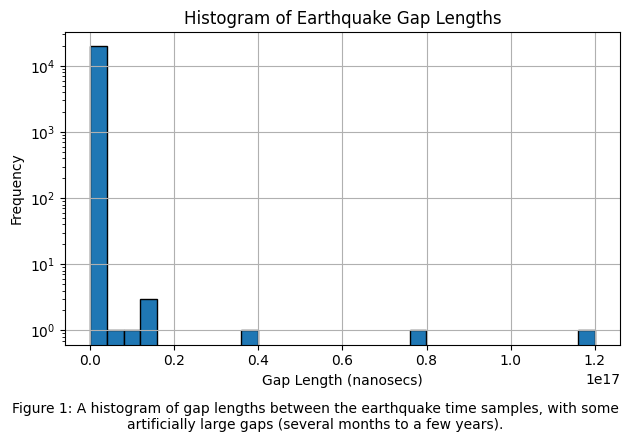

In [37]:
from textwrap import wrap
import matplotlib.pyplot as plt

caption = "Figure 1: A histogram of gap lengths between the earthquake time samples, with some artificially large gaps (several months to a few years)."

plt.hist(eqGoodData["gaps"], bins=30, edgecolor='black', log=True)
plt.title("Histogram of Earthquake Gap Lengths")
plt.xlabel("Gap Length (nanosecs)")
plt.ylabel("Frequency")
plt.grid()
plt.figtext(0.5, 0.1, caption, ha='center', fontsize=10, wrap=True)
plt.tight_layout(rect=[0, 0.15, 1, 1])

The thing that worries me is that by removing some sections of the data to use only stationary periods we created some artificially large gaps: gaps of order ~month. How many nanoseconds in a month? remove all gaps that are larger than about a month and see how the distribution looks (make another histogram).

In [38]:
eqGoodData = eqGoodData[eqGoodData["gaps"] <= 2.628e15]

In [39]:
eqGoodData.shape

(19746, 5)

In [40]:
eqGoodData["gaps"].median()

8532395000000.0

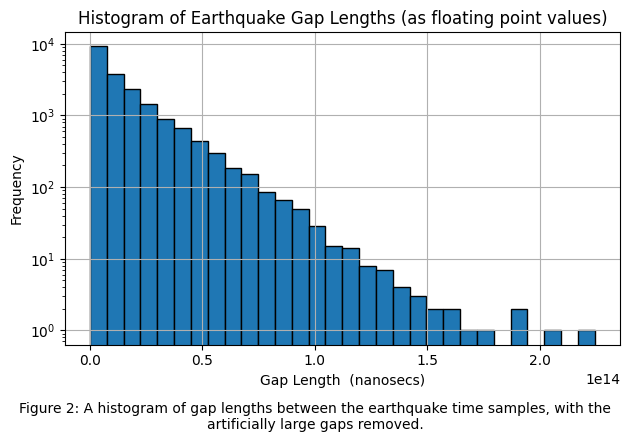

In [49]:
caption = "Figure 2: A histogram of gap lengths between the earthquake time samples, with the artificially large gaps removed."

plt.hist(eqGoodData["gaps"], bins=30, edgecolor='black', log=True)
plt.title("Histogram of Earthquake Gap Lengths (as floating point values)")
plt.xlabel("Gap Length  (nanosecs)")
plt.ylabel("Frequency")
plt.grid()
plt.figtext(0.5, 0.1, caption, ha='center', fontsize=10, wrap=True)
plt.tight_layout(rect=[0, 0.15, 1, 1])

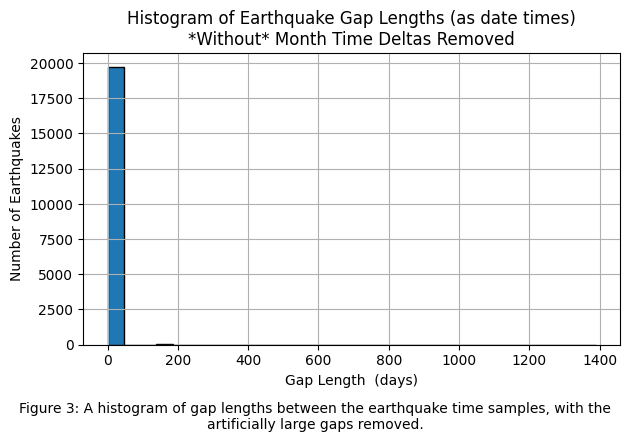

In [59]:
#timeDiffs = eqGoodData["newdatetime"].diff()

caption = "Figure 3: A histogram of gap lengths between the earthquake time samples."

plt.hist(eqGoodData['timediff'].dt.total_seconds() /60 / 60 /24, bins=30, edgecolor='black', log=False)
plt.title("Histogram of Earthquake Gap Lengths (as date times)\n*Without* Month Time Deltas Removed")
plt.xlabel("Gap Length  (days)")
plt.ylabel("Number of Earthquakes")
plt.grid()
plt.figtext(0.5, 0.1, caption, ha='center', fontsize=10, wrap=True)
plt.tight_layout(rect=[0, 0.15, 1, 1])

In [60]:
eqGoodData = eqGoodData[eqGoodData["timediff"] < pd.to_timedelta("30day")]
eqGoodData.shape

(19735, 6)

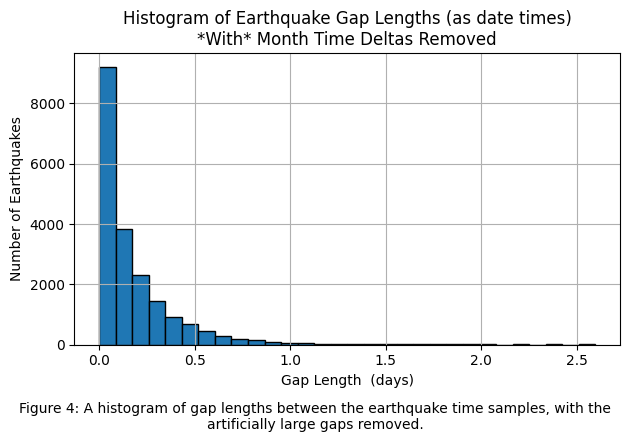

In [61]:
caption = "Figure 4: A histogram of gap lengths between the earthquake time samples, with the artificially large gaps removed."

plt.hist(eqGoodData['timediff'].dt.total_seconds() /60 / 60 /24, bins=30, edgecolor='black', log=False)
plt.title("Histogram of Earthquake Gap Lengths (as date times)\n*With* Month Time Deltas Removed")
plt.xlabel("Gap Length  (days)")
plt.ylabel("Number of Earthquakes")
plt.grid()
plt.figtext(0.5, 0.1, caption, ha='center', fontsize=10, wrap=True)
plt.tight_layout(rect=[0, 0.15, 1, 1])

# PART II - data analysis

### important: the paper does not do it but I want you to formally choose a threshold before you do this test. Choose a p-value (=$\alpha$ thresold: call your variable ```alpha```) of 3-$\sigma$.

Follow the instructions (algorithm) in **Section 3 paragraph 3** and compare your results with the results in table 1 with a threshold  of = 0.01 and 0.001

Do it for all 5 magnitude thresholds as indicated in the paper (and in Table 1).

Note that the x axis in plot Fig 1 is in _log space_. Use ```np.log10()``` to take the logarithm of the time gaps.

The pseudocode for the algorithm is [here](https://github.com/fedhere/DSPS_FBianco/blob/master/HW3/Corral2018pseudocodeKStest.md).


Reproduce the paper Fig 1 and Table 1. In the Table report the size of each dataset after cleaning the value of the statistic and the p-value, as done in Corral 2018. Use the scipy function for the 2 sample KS test. (resources [here](https://colab.research.google.com/notebooks/markdown_guide.ipynb#scrollTo=70pYkR9LiOV0) to learn about the table syntax in markdown)

In [42]:
alpha = 0.0027  # 3 - sigma for normal distribution

## The following was our prompt to ChatGPT to generate the code below:

We are trying to recreate figure 1 found in "STATISTICAL TESTS FOR SCALING IN THE INTER-EVENT TIMES OF EARTHQUAKES IN CALIFORNIA" found athttps://arxiv.org/pdf/0910.0055 in python with a pandas data set that includes the following: [Date, time, mag, datetime(string), newdatetime(pandas object), and timediff (the difference in time between earthquakes as a pandas object) ]. The image is also attached.

The following is the exact verbiage to recreate the graph:
1. important: the paper does not do it but I want you to formally choose a threshold before you do this test. Choose a p-value (= α thresold: call your variable alpha) of 3- σ .
2. Follow the instructions (algorithm) in Section 3 paragraph 3 and compare your results with the results in table 1 with a threshold of = 0.01 and 0.001 Do it for all 5 magnitude thresholds as indicated in the paper (and in Table 1). Note that the x axis in plot Fig 1 is in log space. Use np.log10() to take the logarithm of the time gaps. The pseudocode for the algorithm is here (It will be at the end of this prompt).
3. Reproduce the paper Fig 1 and Table 1. In the Table report the size of each dataset after cleaning the value of the statistic and the p-value, as done in Corral 2018.

Use the scipy function for the 2 sample KS test. (resources here to learn about the table syntax in markdown). Psudocode: aplha = 0.0027 For threshold 0.01 and 0.001:
```
# your code here
aplha = 0.0027

For threshold 0.01 and 0.001:
  	For all Mk values of M in Corral2018:
		{
		# remove gaps below minimum gap threshold
		x_Mk =  gaps where M > M_k
		For i in [1,2]: # do it twice
			{
			# Rescale the time gaps distribution by the mean value of the time gaps.
			Rk = 1 / mean of x_Mk
			X_Mk = x_Mk * Rk where x_Mk*Rk  > threshold # can be achieved broadcasting in python
			}
		# these two lines of code are not necessary cause Rk~1
		Rk = 1 / mean of x_Mk
		x_Mk = x_Mk * Rk

	For all Mk values of M in Corral2018:
		{
   		For all Ml values of M in Corral2018 greater than Mk
			{
			Perform the KS test on (Mk, Ml)
			}
   		}

```
## Below is the outputted working code with modifications:

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp

def compute_rescaled_gaps(gaps, m_cutoff):
    """Given a 1D numpy array `gaps`, compute R = 1/mean, rescale, then drop x < m_cutoff."""
    gaps = np.asarray(gaps, dtype=float)
    # drop non-positive (if any)
    gaps = gaps[gaps > 0]
    R = 1.0 / np.mean(gaps)
    x = gaps * R
    # filter
    x = x[x >= m_cutoff]
    return x, R

def empirical_cdf(arr):
    """Return sorted arr and cdf values P(x) = fraction ≤ x."""
    arr_sorted = np.sort(arr)
    N = len(arr_sorted)
    cdf = np.arange(1, N+1) / N  # or (i)/N
    return arr_sorted, cdf

def test_and_plot_scaling(df, Mks, m_cutoffs=[0.01, 0.001], alpha=0.0027):
    # Store results
    results = {}
    fig, axes = plt.subplots(1, len(m_cutoffs), figsize=(6*len(m_cutoffs), 5))
    caption = "Figure 1: Plot of the distributions from earthquake scaling laws. Graphed are the relations of earthquakes with a minimum magnitude threshold using a K-S test for same parent distribution. The two different plots have different significance levels in the earthquake data, and the counts for each minimum earthquake magnitude are also listed."
    if len(m_cutoffs) == 1:
        axes = [axes]
    for j, m in enumerate(m_cutoffs):
        axes[j].set_xscale('log')
        axes[j].set_xlabel(r'$\log_{10}(x)$ (rescaled gap)')
        axes[j].set_ylabel('Empirical CDF $P(x)$')
        axes[j].set_title(f'm = {m}')
        results[m] = {}
        # compute x_k for each M_k
        x_by_M = {}
        N_by_M = {}
        for Mk in Mks:
            dfk = df[df['mag'] >= Mk]
            # convert timediff to numeric (e.g. in days or seconds)
            gaps = dfk['timediff'].dt.total_seconds().values
            xk, Rk = compute_rescaled_gaps(gaps, m)
            x_by_M[Mk] = xk
            N_by_M[Mk] = len(xk)
            # plot CDF
            xs, cdf = empirical_cdf(xk)
            axes[j].plot(xs, cdf, label=f'M ≥ {Mk} (N={len(xk)})')
        axes[j].legend()
        axes[j].grid(True)

        # KS tests
        results[m]['d'] = {}
        results[m]['p'] = {}
        # for each pair
        for i, Mk in enumerate(Mks):
            for j2, Ml in enumerate(Mks):
                if Ml <= Mk:
                    continue
                xi = x_by_M[Mk]
                xj = x_by_M[Ml]
                if len(xi) < 2 or len(xj) < 2:
                    d, p = np.nan, np.nan
                else:
                    d, p = ks_2samp(xi, xj)
                results[m]['d'][(Mk, Ml)] = d
                results[m]['p'][(Mk, Ml)] = p
    plt.tight_layout()
    plt.figtext(0.5,-0.08,caption,ha="center",wrap=True);
    return results

{0.01: {'d': {(2.0, 2.5): np.float64(0.015253843850467325),
   (2.0, 3.0): np.float64(0.01895790111907278),
   (2.0, 3.5): np.float64(0.045059115787236315),
   (2.0, 4.0): np.float64(0.10308438036709922),
   (2.5, 3.0): np.float64(0.014849466340797455),
   (2.5, 3.5): np.float64(0.04165254237288136),
   (2.5, 4.0): np.float64(0.10278666655754609),
   (3.0, 3.5): np.float64(0.04845827439886846),
   (3.0, 4.0): np.float64(0.11534718347326213),
   (3.5, 4.0): np.float64(0.07802752293577982)},
  'p': {(2.0, 2.5): np.float64(0.26467707585730993),
   (2.0, 3.0): np.float64(0.7245076796895626),
   (2.0, 3.5): np.float64(0.3921254692597733),
   (2.0, 4.0): np.float64(0.18777493596755782),
   (2.5, 3.0): np.float64(0.9608137656999538),
   (2.5, 3.5): np.float64(0.5218101645334242),
   (2.5, 4.0): np.float64(0.19448466283599125),
   (3.0, 3.5): np.float64(0.4403676611339995),
   (3.0, 4.0): np.float64(0.12442601748567128),
   (3.5, 4.0): np.float64(0.6395318494101838)}},
 0.001: {'d': {(2.0, 2.5

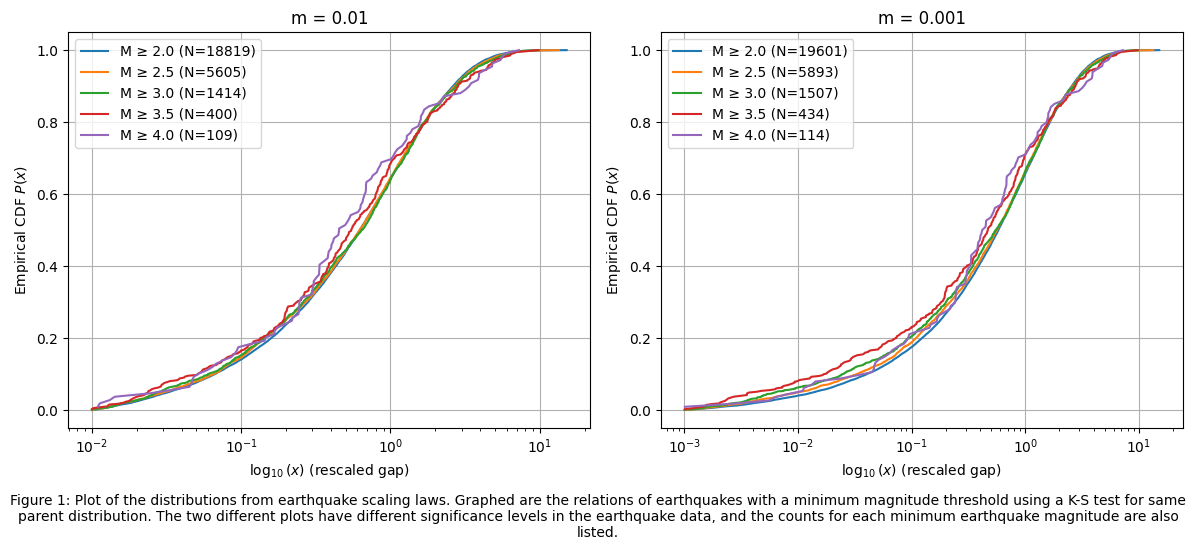

In [64]:
Mks = [2.0, 2.5, 3.0, 3.5, 4.0]
test_and_plot_scaling(eqGoodData, Mks)

Did you find any statistical significant differences between the distributions? What does it mean? Is your result identical to Correll's 2018? Why or why not? **Discuss!**

### "extra credits"

**How could you _force_ a significant result?**
Organize your result for different magnitude threshold in a numpy array (it should be a 5x5 array) for both cutoffs (0.01 and 0.001). Each of these arrays should contain the p-value for the pair of distributions i,j in cell \[i\]\[j\] and \[j\]\[i\]. Use ```imshow``` to visualize this 2D data. FIrst visualize the matrix itself as done below.

In [ ]:
# your code here

pl.imshow((ks_001));
pl.axis('off')
cb = pl.colorbar()
cb.ax.set_ylabel(r'$p$-value')
pl.title("KS test results");
#add a caption


Now visualize the result as a matrix where the cells are white if the results is not statistically significant and red otherwise.
After doing it fot the set alpha threshold, lower your alpha threshold so that at least one pair of distribution has a statistically significant difference. **Warning!! this is an _unethical and horrifying practice_! Once you chose your significance threshold you are never allowed to change it! Why? Discuss**

Redoing it for threshold 0001